# JOBSHEET 7 - CLUSTERING

#### Nama: Magfiroh Indah Karisma
#### NIM: 2141720180

## PRAKTIKUM 1 
### KMeans

Import Library

In [6]:
# Mengimpor pustaka Pandas dengan alias 'pd' untuk membaca dan mengelola data
import pandas as pd

# Mengimpor pustaka NumPy dengan alias 'np' untuk operasi numerik
import numpy as np

# Mengimpor pustaka Matplotlib dengan alias 'plt' untuk membuat plot dan visualisasi data
import matplotlib.pyplot as plt

# Mengimpor kelas KMeans dari modul scikit-learn untuk melakukan analisis klaster menggunakan algoritma K-Means
from sklearn.cluster import KMeans

# Membaca data dari file 'Iris.csv' dan menyimpannya dalam sebuah DataFrame yang disebut 'df'
df = pd.read_csv('data/Iris.csv')

# Mencetak lima baris pertama dari DataFrame 'df' untuk menampilkan contoh-contoh awal dari dataset Iris
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# Seleksi fitur: Mengambil kolom dari indeks ke-1 sampai kolom terakhir ke-2
X = df.iloc[:, 1:-1]

# Seleksi target: Mengambil kolom terakhir
y = df.iloc[:, -1]

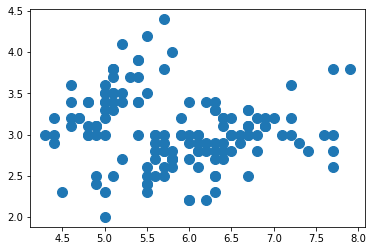

In [8]:
# Plot Data
# Karena data 4 dimensi, maka akan kita coba
# plot cluster berdasarkan Sepal Length dan Sepal Width  saja

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

In [9]:
# Mengimpor kelas KMeans dari modul scikit-learn
from sklearn.cluster import KMeans

# Inisiasi obyek KMeans dengan 2 klaster (k=2)
cl_kmeans = KMeans(n_clusters=2)

# Melakukan fitting model KMeans pada data fitur 'X' dan melakukan prediksi
y_kmeans = cl_kmeans.fit_predict(X)

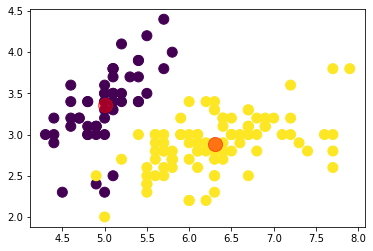

In [10]:
# Membuat scatter plot untuk hasil klasterisasi dengan warna sesuai klaster yang dihasilkan
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=100, c=y_kmeans)

# Membuat plot untuk menampilkan posisi centroid (titik tengah klaster)
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [11]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


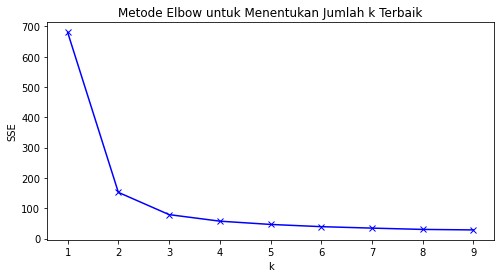

In [12]:
# Implementasi Metode Elbow
# Inisiasi list untuk menyimpan nilai SSE (Sum of Squared Errors)
sse = []

# Mencari k terbaik dari rentang 1-10
K = range(1, 10)

# Melakukan iterasi untuk setiap nilai k dalam rentang
for k in K:
    kmeanModel = KMeans(n_clusters=k)  # Membuat model K-Means dengan jumlah klaster k
    kmeanModel.fit(X)  # Melakukan fitting model pada data fitur X
    sse.append(kmeanModel.inertia_)  # Menambahkan nilai SSE ke dalam list

# Membuat plot untuk menampilkan hasil metode Elbow
plt.figure(figsize=(8, 4))
plt.plot(K, sse, "bx-")  # Menampilkan grafik dengan nilai k (jumlah klaster) di sumbu x dan SSE di sumbu y
plt.xlabel("k")  # Label sumbu x
plt.ylabel("SSE")  # Label sumbu y
plt.title("Metode Elbow untuk Menentukan Jumlah k Terbaik")  # Judul plot
plt.show()  # Menampilkan plot

In [13]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8243999999996
k=2; SSE=152.36870647733915
k=3; SSE=78.94084142614601
k=4; SSE=57.34540931571815
k=5; SSE=46.535582051282034
k=6; SSE=39.20485962280962
k=7; SSE=34.38385925925927
k=8; SSE=30.077530998389694
k=9; SSE=28.43824643874645


## PRAKTIKUM 2

Import library

In [14]:
# Mengimpor pustaka matplotlib.pyplot dengan alias plt untuk membuat plot
import matplotlib.pyplot as plt

# Mengimpor pustaka Seaborn dengan alias sns dan mengatur tema plot menggunakan sns.set()
import seaborn as sns
sns.set()

# Mengimpor pustaka NumPy dengan alias np untuk komputasi numerik
import numpy as np

### Pengantar KMeans

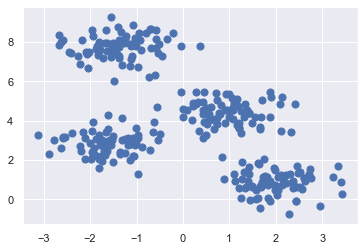

In [15]:
# Mengimpor fungsi make_blobs dari sklearn.datasets, yang digunakan untuk membuat dataset sintetis
from sklearn.datasets import make_blobs

# Membuat dataset sintetis dengan parameter sebagai berikut:
# - n_samples: Jumlah sampel dalam dataset (300)
# - centers: Jumlah klaster yang akan dibuat (4)
# - cluster_std: Standar deviasi klaster (0.60)
# - random_state: Seed untuk menghasilkan dataset yang konsisten
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Membuat scatter plot dari data dengan sumbu x menggunakan X[:, 0] dan sumbu y menggunakan X[:, 1]
# Nilai s=50 mengatur ukuran titik dalam plot
plt.scatter(X[:, 0], X[:, 1], s=50)

In [16]:
# Mengimpor modul KMeans dari sklearn.cluster
from sklearn.cluster import KMeans

# Membuat objek KMeans dengan jumlah klaster yang diinginkan, dalam hal ini 4 klaster
kmeans = KMeans(n_clusters=4)

# Melakukan fitting model K-Means pada data X
kmeans.fit(X)

# Memprediksi klaster untuk setiap sampel dalam dataset X
y_kmeans = kmeans.predict(X)

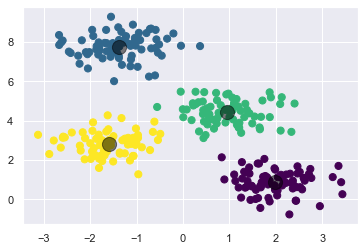

In [18]:
# Membuat scatter plot dari data dengan warna berdasarkan hasil klastering y_kmeans
# Sumbu x menggunakan X[:, 0], sumbu y menggunakan X[:, 1]
# Nilai c=y_kmeans mengatur warna berdasarkan hasil klastering
# Nilai s=50 mengatur ukuran titik dalam plot
# cmap='viridis' mengatur peta warna yang digunakan
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_

# Menambahkan titik-titik yang merupakan pusat klaster (centroids) dengan warna hitam
# Sumbu x menggunakan centers[:, 0], sumbu y menggunakan centers[:, 1]
# Nilai c='black' mengatur warna titik-titik pusat klaster
# Nilai s=200 mengatur ukuran titik pusat klaster
# Nilai alpha=0.5 mengatur tingkat transparansi titik pusat klaster
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

### Algoritma Expectation-Maximization

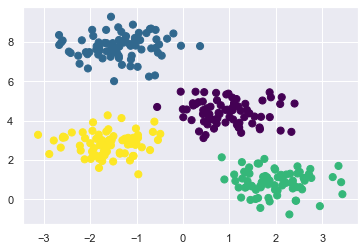

In [20]:
from sklearn.metrics import pairwise_distances_argmin

# Membuat fungsi find_clusters yang mengambil tiga argumen:
# - X: data yang akan dikelompokkan
# - n_clusters: jumlah klaster yang diinginkan
# - rseed: seed yang digunakan untuk menghasilkan angka acak
def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    # Menggunakan random seed (rseed) untuk membuat angka acak yang konsisten
    rng = np.random.RandomState(rseed)
    # Memilih acak beberapa titik sebagai pusat awal klaster
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. input label center yang baru
        # Menghitung jarak dari setiap titik data ke pusat klaster terdekat dan mengasosiasikan titik-titik tersebut dengan klaster
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. update center dari titik baru
        # Menghitung pusat baru (rata-rata) untuk masing-masing klaster
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. cek konvergensi
        # Memeriksa apakah pusat klaster telah konvergen (tidak berubah lagi)
        if np.all(centers == new_centers):
            break
        centers = new_centers
        
    # Mengembalikan pusat-pusat klaster dan label klaster untuk setiap titik
    return centers, labels

# Memanggil fungsi find_clusters untuk mengelompokkan data menjadi 4 klaster
centers, labels = find_clusters(X, 4)

# Membuat scatter plot dari data dengan warna berdasarkan label klaster yang telah dihasilkan
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

Perubahan random

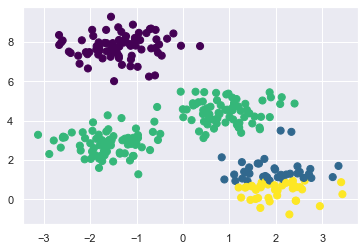

In [21]:
# Memanggil fungsi find_clusters dengan seed acak yang berbeda (rseed=0) untuk menghasilkan pengelompokan alternatif
centers, labels = find_clusters(X, 4, rseed=0)

# Membuat scatter plot dari data dengan warna berdasarkan label klaster yang baru dihasilkan
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

Optimalisasi Jumlah Klaster

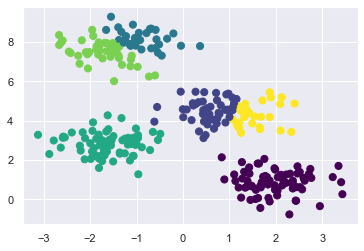

In [22]:
# Menggunakan K-Means dengan 6 klaster dan seed acak 0 untuk mengelompokkan data
labels = KMeans(6, random_state=0).fit_predict(X)

# Membuat scatter plot dari data dengan warna berdasarkan label klaster yang dihasilkan
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

Batas Klaster yang Tidak Selalu Linier

In [23]:
from sklearn.datasets import make_moons

# Menggunakan fungsi make_moons untuk membuat data sintetis dengan 200 sampel
# Data ini terdiri dari dua fitur yang membentuk dua bulan sabit yang saling berdekatan
# Noise sebesar 0.05 ditambahkan untuk menambahkan sedikit gangguan pada data
# Seed acak (random_state=0) digunakan untuk membuat data yang konsisten setiap kali kode dijalankan
X, y = make_moons(200, noise=.05, random_state=0)

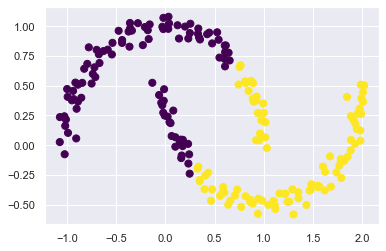

In [24]:
# Menggunakan K-Means dengan 2 klaster dan seed acak 0 untuk mengelompokkan data
labels = KMeans(2, random_state=0).fit_predict(X)

# Membuat scatter plot dari data dengan warna berdasarkan label klaster yang dihasilkan
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


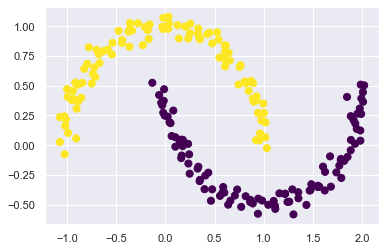

In [25]:
from sklearn.cluster import SpectralClustering

# Menggunakan SpectralClustering dengan 2 klaster
# Affinity parameter diatur sebagai 'nearest_neighbors' untuk mengukur kedekatan antar titik
# assign_labels diatur sebagai 'kmeans' untuk mengassign label klaster
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')

# Membuat prediksi label klaster dengan model SpectralClustering
labels = model.fit_predict(X)

# Membuat scatter plot dari data dengan warna berdasarkan label klaster yang dihasilkan
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

### Contoh Kasus 1: Karakter Angka

In [26]:
from sklearn.datasets import load_digits

# Mengimpor modul load_digits dari sklearn.datasets
# Menggunakan fungsi load_digits() untuk memuat dataset digits
# Data tersebut berisi gambar-gambar angka tulisan tangan
# .data.shape digunakan untuk mengakses bentuk (shape) dari data
digits = load_digits()
digits.data.shape

(1797, 64)

In [27]:
# Terapkan K-Means
# Inisiasi model K-Means dengan 10 klaster dan seed acak 0
kmeans = KMeans(n_clusters=10, random_state=0)

# Melakukan prediksi klaster pada data gambar digit menggunakan model K-Means
clusters = kmeans.fit_predict(digits.data)

# Mengakses bentuk (shape) dari pusat klaster yang dihasilkan
kmeans.cluster_centers_.shape

(10, 64)

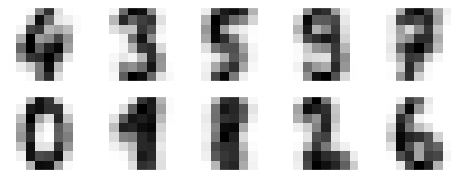

In [28]:
# Membuat subplot 2x5 dengan ukuran 8x3
fig, ax = plt.subplots(2, 5, figsize=(8, 3))

# Mengakses pusat klaster dari model K-Means dan mengubah bentuknya menjadi 10 gambar berukuran 8x8
centers = kmeans.cluster_centers_.reshape(10, 8, 8)

# Loop melalui subplot dan gambar-gambar pusat klaster
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [29]:
from scipy.stats import mode

# Mengimpor modul mode dari scipy.stats
# Membuat array labels yang memiliki bentuk yang sama dengan clusters, diinisialisasi dengan nilai 0
labels = np.zeros_like(clusters)

# Looping dari 0 hingga 9 (10 klaster)
for i in range(10):
    # Membuat mask untuk mengidentifikasi elemen-elemen dalam clusters yang sama dengan i
    mask = (clusters == i)
    
    # Mengassign label klaster dengan mode dari target digit yang sesuai dengan klaster tersebut
    labels[mask] = mode(digits.target[mask])[0]

In [30]:
from sklearn.metrics import accuracy_score

# Mengimpor modul accuracy_score dari sklearn.metrics
# Menghitung akurasi prediksi dengan membandingkan target sebenarnya (digits.target) dengan label yang telah diassign (labels)
accuracy_score(digits.target, labels)

0.7935447968836951

Text(89.18, 0.5, 'predicted label')

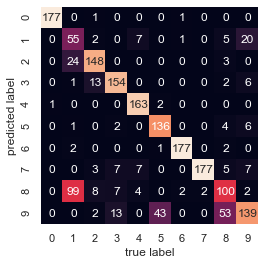

In [31]:
from sklearn.metrics import confusion_matrix

# Mengimpor modul confusion_matrix dari sklearn.metrics
# Menghitung matriks kebingungan antara target sebenarnya (digits.target) dan label yang telah diassign (labels)
mat = confusion_matrix(digits.target, labels)

# Membuat heatmap dari matriks kebingungan yang telah di-transpose (mat.T)
# Dengan parameter square=True, annot=True, fmt='d', cbar=False, xticklabels=digits.target_names, yticklabels=digits.target_names
# Menambahkan label x dan y
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [32]:
from sklearn.manifold import TSNE

# Mengimpor modul TSNE dari sklearn.manifold
# Inisialisasi obyek TSNE dengan 2 komponen, inisialisasi 'random', dan seed acak 0
tsne = TSNE(n_components=2, init='random', random_state=0)

# Menggunakan TSNE untuk mengubah data digit menjadi 2 dimensi (digits_proj)
digits_proj = tsne.fit_transform(digits.data)

# Inisialisasi obyek KMeans dengan 10 klaster dan seed acak 0
kmeans = KMeans(n_clusters=10, random_state=0)

# Prediksi klaster menggunakan KMeans pada data yang telah diubah menjadi 2 dimensi
clusters = kmeans.fit_predict(digits_proj)

# Inisialisasi array label dengan ukuran yang sama dengan clusters
labels = np.zeros_like(clusters)

# Mengassign label dengan mode dari target digit untuk setiap klaster
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Menghitung akurasi dengan membandingkan target sebenarnya (digits.target) dengan label yang telah diassign (labels)
accuracy_score(digits.target, labels)

0.9348914858096828

### Studi Kasus 2: Kompresi Citra

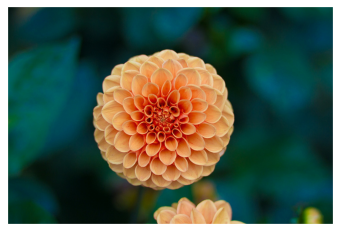

In [33]:
from sklearn.datasets import load_sample_image

# Mengimpor modul load_sample_image dari sklearn.datasets
# Memuat citra "flower.jpg" dari sampel citra yang disediakan oleh scikit-learn
flower = load_sample_image("flower.jpg")

# Membuat sumbu gambar tanpa tanda sumbu (xticks dan yticks) menggunakan plt.axes
ax = plt.axes(xticks=[], yticks=[])

# Menampilkan citra bunga di sumbu gambar
ax.imshow(flower);

In [34]:
# Mencetak bentuk (shape) citra "flower" untuk mengetahui dimensinya
flower.shape

(427, 640, 3)

In [35]:
# Mengonversi nilai piksel citra "flower" menjadi rentang [0, 1] dengan membagi semua nilai oleh 255.0
data = flower / 255.0

# Mengubah bentuk data citra "flower" menjadi bentuk yang dapat digunakan untuk pemrosesan
data = data.reshape(427 * 640, 3)

# Mencetak bentuk (shape) data setelah diubah
data.shape

(273280, 3)

In [36]:
# Fungsi untuk plot piksel dari data citra
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # Pilih subset data secara acak
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    # Buat gambar dengan dua subplot
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    # Scatter plot untuk kanal Red (R) dan Green (G)
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    # Scatter plot untuk kanal Red (R) dan Blue (B)
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    # Judul dari gambar
    fig.suptitle(title, size=20);

# Menjelaskan fungsi plot_pixels yang digunakan untuk memplot distribusi warna dalam citra

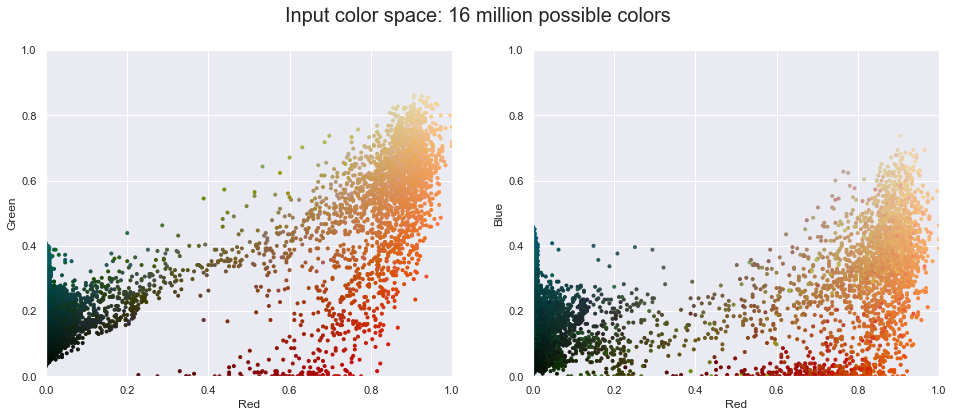

In [37]:
# Memanggil fungsi plot_pixels untuk memplot distribusi warna dalam citra
plot_pixels(data, title='Input color space: 16 million possible colors')

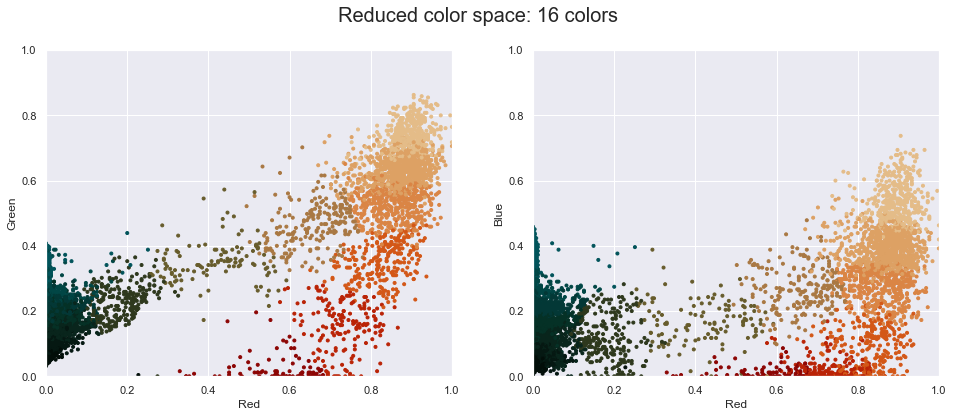

In [38]:
import warnings; warnings.simplefilter('ignore')  # Menonaktifkan peringatan yang terkait dengan NumPy.

# Mengimpor MiniBatchKMeans dari sklearn.cluster
from sklearn.cluster import MiniBatchKMeans

# Inisiasi objek MiniBatchKMeans dengan 16 klaster
kmeans = MiniBatchKMeans(16)

# Melatih model MiniBatchKMeans dengan data
kmeans.fit(data)

# Menghitung warna baru untuk setiap piksel
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

# Memanggil fungsi plot_pixels untuk memplot distribusi warna dalam citra setelah reduksi warna
plot_pixels(data, colors=new_colors, title="Reduced color space: 16 colors")

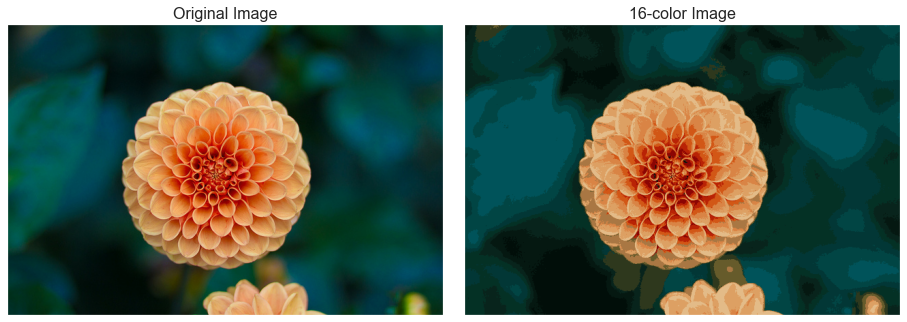

In [39]:
flower_recolored = new_colors.reshape(flower.shape)

# Membuat plot citra asli dan citra dengan 16 warna yang telah diubah
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

## PRAKTIKUM 3 : Self-optimizing Map (SOM)

Instalasi SOM

In [40]:
pip install minisom

  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10592 sha256=362202b0bd0246f1fa249acdfd058d23af828c66d263af6cd1e26f10790190eb
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\7b\fd\40\c318df5c7fa3b276930ab30fed7306b603007e9b24d5479958
Successfully built minisom
Note: you may need to restart the kernel to use updated packages.


In [41]:
from minisom import MiniSom  # Import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

Gunakan dataset Iris sebagai contoh

In [42]:
# Load dataset
iris = datasets.load_iris()  # Memuat dataset iris
data = iris.data  # Mengambil data iris

Normalisasi dataset agar nilainya berada dalam rentang yang seragam.

In [43]:
# Normalisasi data
data = data / data.max(axis=0)

Menentukan ukuran peta, misalkan (10x10) dan inisialisasi SOM

In [44]:
# Inisialisasi SOM
map_size = (10, 10)
som = MiniSom(map_size[0], map_size[1], data.shape[1], sigma=0.5, learning_rate=0.5)

Inisialisasi bobot SOM secara acak

In [45]:
# Inisialisasi bobot secara acak
som.random_weights_init(data)

Melatih SOM dengan data menggunakan metode train_random

In [46]:
# Pelatihan SOM
num_epochs = 100
som.train_random(data, num_epochs)

Menggunakan peta hasil pelatihan untuk visualisasi. Dalam praktikum ini, akan menampilkan peta dengan warna dan menandai pemenang untuk setiap sampel.

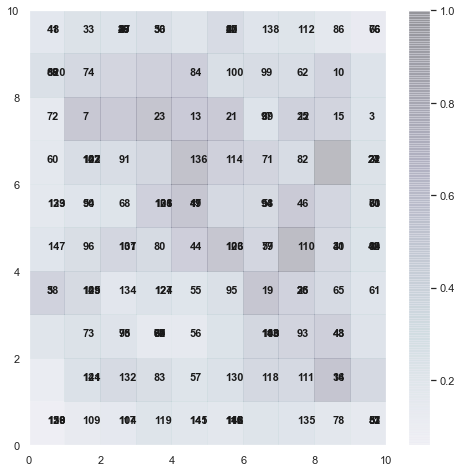

In [47]:
# Visualisasi hasil SOM
plt.figure(figsize=(8, 8))  # Membuat sebuah figur dengan ukuran 8x8
for i, x in enumerate(data):
    w = som.winner(x)  # Menentukan neuron pemenang untuk sampel x
    plt.text(w[0]+.5, w[1]+.5, str(i+1), color='k', fontdict={'weight': 'bold', 'size': 11})
    # Menambahkan teks pada posisi neuron pemenang
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)  # Menampilkan peta jarak antar neuron
plt.colorbar()  # Menambahkan colorbar

plt.show()  # Menampilkan figur yang telah dibuat

## PRAKTIKUM 4

Instalasi minisom

In [1]:
pip install minisom

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [3]:
# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

In [4]:
# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

In [5]:
# Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

In [6]:
# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

In [7]:
# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

In [9]:
# Load citra Lenna (Anda bisa mengganti ini dengan citra lain jika diperlukan)
Lenna_path = "data/Lenna.jpg"
Lenna = io.imread(Lenna_path) / 255.0  # Normalisasi intensitas piksel menjadi rentang [0, 1]

In [13]:
# Latih SOM
num_epochs = 100
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(Lenna, num_epochs, initial_learning_rate, initial_neighborhood_radius)

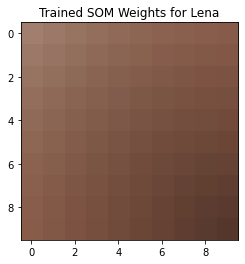

In [14]:
# Visualisasi bobot SOM
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Lena')
plt.show()

## TUGAS PRAKTIKUM

### Tugas
Buatlah sebuah model K-Means dengan ketentuan,
1. Gunakan data 'Mall_Customers.csv'
2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik
4. Buatlah implementasi model SOM untuk segmentasi citra lain

In [15]:
import pandas as pd

# Membaca data dari file CSV
data = pd.read_csv('data/Mall_Customers.csv')

# Menampilkan beberapa baris pertama data
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [16]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


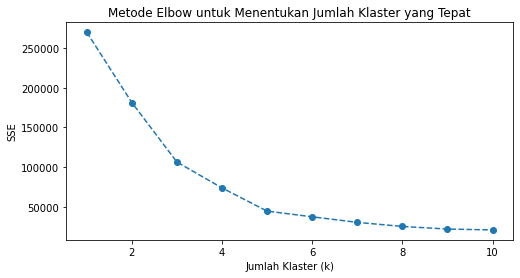

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Menghitung nilai SSE (Sum of Squared Errors) untuk berbagai nilai k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot SSE untuk berbagai nilai k
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), sse, marker='o', linestyle='--')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('SSE')
plt.title('Metode Elbow untuk Menentukan Jumlah Klaster yang Tepat')
plt.show()

In [18]:
best_k = 5  # Misalnya, kita pilih jumlah klaster terbaik
kmeans = KMeans(n_clusters=best_k, random_state=0)
kmeans.fit(X)

# Menambahkan label klaster ke data
data['Cluster'] = kmeans.labels_

# Menampilkan hasil clustering
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        3  
2        4  
3        3  
4        4  


#### Segmentasi citra lain (flower.jpg)

Import library

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.datasets import load_sample_image

Memuat citra

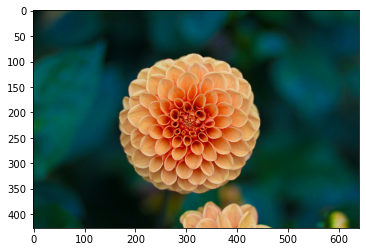

In [27]:
flower = load_sample_image("flower.jpg")
plt.imshow(flower);

In [22]:
flower = flower / 255.0  # Normalisasi intensitas piksel menjadi rentang [0, 1]
data = flower.reshape(427 * 640, 3)  # Ubah bentuk citra menjadi data yang dapat diproses

Inisialisasi SOM

In [23]:
som = MiniSom(50, 50, 3, sigma=0.3, learning_rate=0.5, random_seed=10)  # Inisialisasi SOM dengan parameter yang sesuai
som.random_weights_init(data)  # Inisialisasi bobot SOM secara acak

Pelatihan SOM

In [24]:
som.train_random(data, 5000)  # Melakukan pelatihan SOM pada data

Menggunakan SOM untuk segmentasi citra

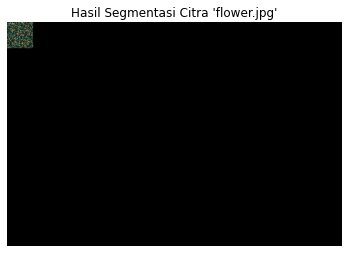

In [25]:
win_map = som.win_map(data)  # Mencari pemenang untuk setiap data
segmented_image = np.zeros(flower.shape)  # Membuat citra kosong untuk hasil segmentasi

for position, color in win_map.items():
    x, y = position
    for coord in color:
        segmented_image[x, y] = coord

# Menampilkan citra hasil segmentasi
plt.figure(figsize=(6, 6))
plt.imshow(segmented_image)
plt.title("Hasil Segmentasi Citra 'flower.jpg'")
plt.axis('off')
plt.show()